# <span style="color:blue"> Projeto - Concessão de cartões de crédito </span>

Faremos uma primeira análise mais básica, avaliada pela acurácia. Aprimoraremos a análise e o modelo nos próximos passos

## Entendimento dos dados
Foram fornecidas 15 variáveis mais a variável resposta (em negrito na tabela). O significado de cada uma dessas variáveis se encontra na tabela.


| Variable Name            | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| sexo| M = 'Masculino'; F = 'Feminino' |M/F|
| posse_de_veiculo| Y = 'possui'; N = 'não possui' |Y/N|
| posse_de_imovel| Y = 'possui'; N = 'não possui' |Y/N|
| qtd_filhos| Quantidade de filhos |inteiro|
| tipo_renda|Tipo de renda (ex: assaliariado, autônomo etc) | texto |
| educacao| Nível de educação (ex: secundário, superior etc) |texto|
| estado_civil | Estado civil (ex: solteiro, casado etc)| texto |
| tipo_residencia | tipo de residência (ex: casa/apartamento, com os pais etc) | texto |
| idade | idade em anos |inteiro|
| tempo de emprego | tempo de emprego em anos |inteiro|
| possui_celular | Indica se possui celular (1 = sim, 0 = não) |binária|
| possui_fone_comercial | Indica se possui telefone comercial (1 = sim, 0 = não) |binária|
| possui_fone | Indica se possui telefone (1 = sim, 0 = não) |binária|
| possui_email | Indica se possui e-mail (1 = sim, 0 = não) |binária|
| qt_pessoas_residencia | quantidade de pessoas na residência |inteiro|
| **mau** | indicadora de mau pagador (True = mau, False = bom) |binária|





#### Carregando os pacotes


In [37]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [38]:
df = pd.read_csv('demo01.csv')
print ("Número de linhas e colunas da tabela: {}".format(df.shape))

df.head()

Número de linhas e colunas da tabela: (16650, 16)


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


#### Entendimento dos dados - Univariada
Vamos ver a variável resposta e dois exemplos de univariada apenas. Mas sinta-se à vontade para tentar observar outras variáveis.

In [39]:
print(df['mau'].value_counts())
print("\nTaxa de inadimplentes:")
print(df['mau'].mean())

False    16260
True       390
Name: mau, dtype: int64

Taxa de inadimplentes:
0.023423423423423424


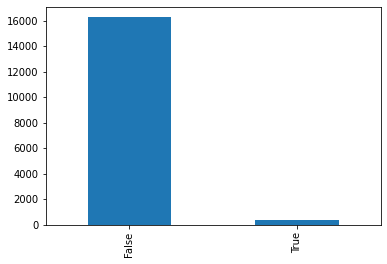

In [40]:
var = 'mau'
grafico_barras = df[var].value_counts().plot.bar()

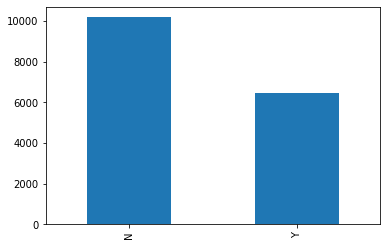

In [41]:
var = 'posse_de_veiculo'
grafico_barras = df[var].value_counts().plot.bar()

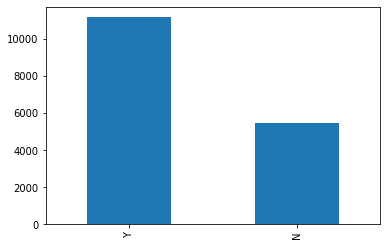

In [42]:
var = 'posse_de_imovel'
grafico_barras = df[var].value_counts().plot.bar()

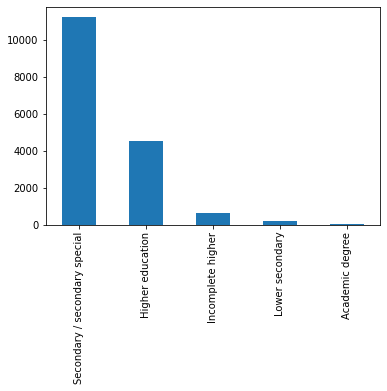

In [43]:
var = 'educacao'
grafico_barras = df[var].value_counts().plot.bar()

<Figure size 432x288 with 0 Axes>

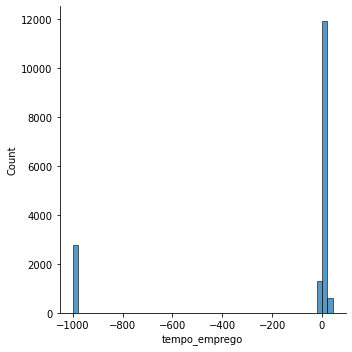

In [44]:
plt.clf()
var = "tempo_emprego"

sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 432x288 with 0 Axes>

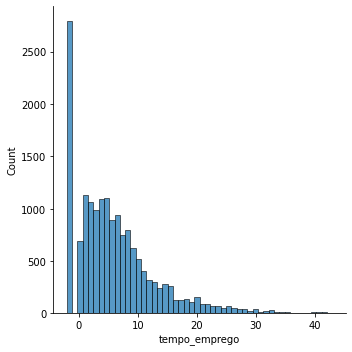

In [45]:
# Alterando valores de -1000 pra -2, para visualizar melhor no gráfico
var = "tempo_emprego"
df.loc[df[var]<0,var] = -2

plt.clf()
var = "tempo_emprego"

sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 432x288 with 0 Axes>

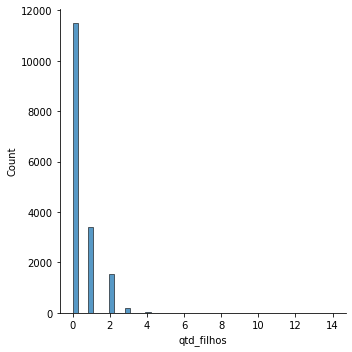

In [46]:
plt.clf()
var = "qtd_filhos"

sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 432x288 with 0 Axes>

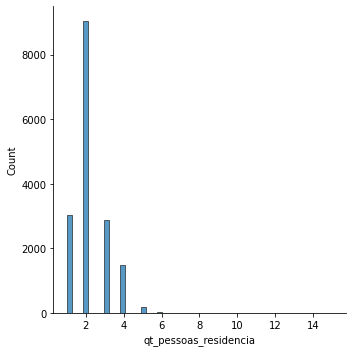

In [47]:
plt.clf()
var = "qt_pessoas_residencia"

sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 432x288 with 0 Axes>

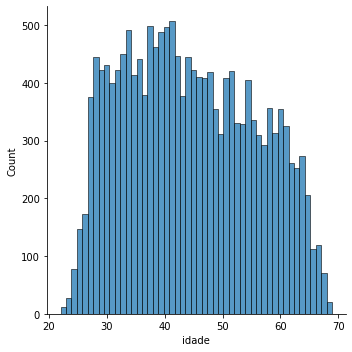

In [48]:
plt.clf()
var = "idade"

sns.displot(df, x = var, bins = 50)
plt.show()

### Entendimento dos dados - Bivariadas

- Inadimplência x idade


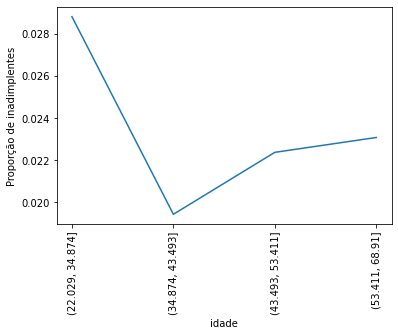

In [49]:
var = 'idade'
cat_srs, bins = pd.qcut(df[var], 4, retbins=True)
g = df.groupby(cat_srs)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_ylabel("Proporção de inadimplentes")
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)

- Inadimplência x Tempo de emprego

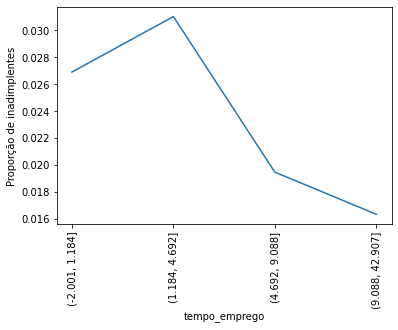

In [50]:
var = 'tempo_emprego'
cat_srs, bins = pd.qcut(df[var], 4, retbins=True)
g = df.groupby(cat_srs)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_ylabel("Proporção de inadimplentes")
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)

Aparentemente a tempo de emprego influencia bastante a inadimplência. Quanto mais tempo empregado, menor a inadimplência.

A seguir, analisaremos todas as variáveis em relação à inadimplência.

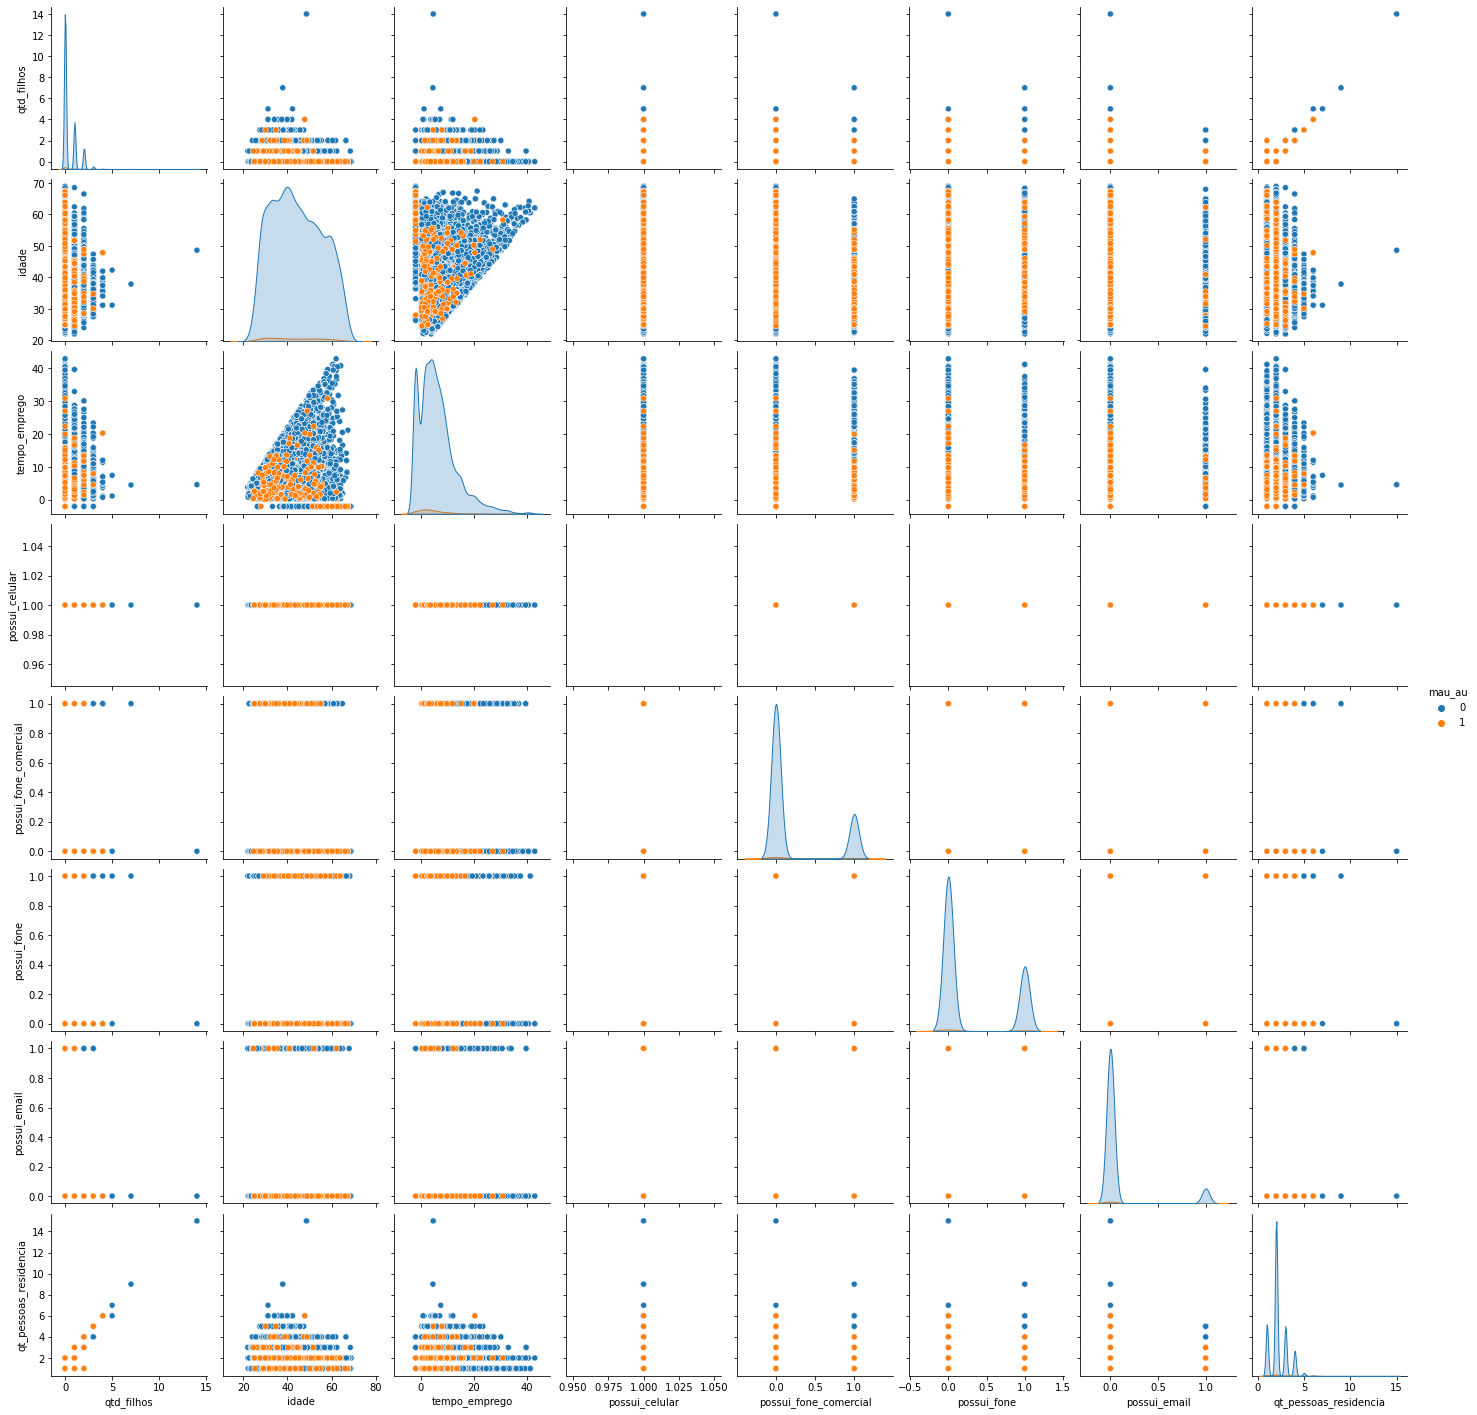

In [51]:
df_grafico = df.copy() # auxiliar
df_grafico['mau_au'] = np.where(df_grafico['mau'] == False, 0, 1)

sns.pairplot(data = df_grafico[['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'possui_celular', 'possui_fone_comercial',
       'possui_fone', 'possui_email', 'qt_pessoas_residencia', 'mau_au']], hue = 'mau_au')

texto aqui

## Preparação dos dados
Para essa base, nessa etapa realizamos apenas a limpeza e tratamento dos dados

Os dados já estão pré-selecionados, construídos e integrados, mas há dados faltantes que serão eliminados na próxima célula

In [65]:
metadata = pd.DataFrame(df.dtypes, columns = ['tipo'])

metadata['n_categorias'] = 0

for var in metadata.index:
    metadata.loc[var,'n_categorias'] = len(df.groupby([var]).size())
    
metadata

,tipo,n_categorias
qtd_filhos,int64,8
idade,float64,5298
tempo_emprego,float64,3005
possui_celular,int64,1
possui_fone_comercial,int64,2
possui_fone,int64,2
possui_email,int64,2
qt_pessoas_residencia,float64,9
mau,bool,2
sexo_M,uint8,2


In [66]:
def convert_dummy(df, feature,rank=0):
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest],axis=1,inplace=True)
    df.drop([feature],axis=1,inplace=True)
    df=df.join(pos)
    return df

In [68]:
for var in metadata[metadata['tipo'] == 'object'].index:
    df = convert_dummy(df, var)

df

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,1,...,0,0,0,0,0,0,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,0,0,0,1,0,0,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,0,0,0,1,0,0,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,False,1,...,0,0,0,0,0,0,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,False,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,True,0,...,0,1,0,0,0,0,0,0,0,0
16646,0,43.389041,7.380822,1,1,1,0,2.0,True,0,...,0,0,0,0,0,0,0,0,0,0
16647,0,30.005479,9.800000,1,1,0,0,2.0,True,1,...,0,0,0,0,0,0,0,0,0,0
16648,0,30.005479,9.800000,1,1,0,0,2.0,True,1,...,0,0,0,0,0,0,0,0,0,0


## Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
Utilizaremos a técnica de floresta aleatória (**random forest**), pois é uma técnica bastante versátil e robusta que captura bem padrões complexos nos dados, relativamente fácil de se usar e que costuma produzir excelentes resultados para uma classificação como estas. Vamos ver esse algoritmo em detalhes mais adiante no curso, mas pense nele por enquanto como uma regra complexa baseada nas variáveis explicativas que classifica o indivíduo como inadimplente ou não. Mais adiante no curso vamos extrair mais dessa técnica.
- Desenho do teste
Antes de rodar o modelo precisamos construir um desenho do teste que será realizado. Para desenvolver um modelo como este, é considerado uma boa prática dividir a base em duas, uma chamada ```treinamento```, onde o algoritmo 'aprende', e outra chamada ```teste```, onde o algoritmo é avaliado. Essa prática fornece uma métrica de avaliação mais fidedigna do algoritmo, falaremos mais detalhes em lições futuras.
- Avaliação do modelo
Faremos a avaliação do nosso modelo através do percentual de acerto, avaliando a classificação do modelo (inadimplente e não inadimplente) e comparando com o estado real armazenado na variável resposta (```AtrasoRelevante2anos```). Esse percentual de acerto é frequentemente chamado de acurácia (**obs:** nunca usar assertividade... a**ss**ertivo não é aquele que a**c**erta, e sim "*adj.: em que o locutor declara algo, positivo ou negativo, do qual assume inteiramente a validade; declarativo*." a**C**ertivo está errado ;)
#### Dividindo a base em treino e teste



In [70]:
# Tirando a v. resposta da base de treinamento
x = df.drop("mau",axis = 1)
y = df["mau"]

# Tirando ID da base de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [71]:
x_train

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,posse_de_veiculo_Y,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
180,0,55.178082,-2.000000,1,0,1,1,2.0,0,1,...,0,0,0,0,0,0,0,0,0,0
6173,1,40.591781,4.580822,1,0,0,0,2.0,0,1,...,0,0,1,0,0,0,0,0,0,0
4618,1,27.753425,4.523288,1,0,0,0,2.0,0,1,...,0,0,0,1,0,0,0,0,0,0
7952,1,31.312329,8.671233,1,1,0,0,3.0,1,1,...,0,0,0,0,0,0,0,0,0,0
6760,0,52.142466,1.128767,1,1,0,0,2.0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12741,0,40.564384,1.945205,1,1,1,0,1.0,1,1,...,0,0,1,0,0,0,0,0,0,0
4826,1,39.819178,18.224658,1,0,0,0,3.0,1,0,...,0,0,0,0,0,0,1,0,0,0
16129,0,46.383562,24.643836,1,0,0,0,1.0,0,1,...,0,0,0,1,0,0,0,0,0,0
5923,0,52.602740,32.742466,1,0,0,0,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Rodando o modelo
A função RandomForestClassifier gera a estrutura da floresta aleatória, e o parâmetro ```n_estimator``` define o número de árvores na floresta. Normalmente a acurácia do modelo tende a aumentar com o número de árvores, pelo menos até um certo limite - e aumenta também o recurso computacional demandado. Você pode alterar esse parâmetro e verificar se a acurácia do seu modelo melhora - não recomendamos valores muito altos. Vá alterando aos poucos e percebendo como o tempo aumenta com os seus recursos. Não é necessário ir muito além de umas 100 árvores.

In [72]:
# Treinar uma Random Forest com 3 árvores

clf = RandomForestClassifier(n_estimators=3)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=3)

In [73]:
# Calculando a acuracia

y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 97.19%


In [74]:
# Matriz de confusão

tab = pd.crosstab(index = y_pred, columns = y_test)
print(tab[1][0]/(tab[1][0] + tab[0][0]))
print(tab[1][1]/(tab[1][1] + tab[0][1]))
tab

0.01850499147796445
0.26785714285714285


mau,False,True
row_0,,
False,4031,76
True,41,15


### <span style="color:blue">Alterando parâmentros do Random Forest </span>


In [77]:
# Treinar uma Random Forest com 5 árvores

clf = RandomForestClassifier(n_estimators=5)
clf.fit(x_train,y_train)

# Calculando a acuracia

y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

# Matriz de confusão

tab = pd.crosstab(index = y_pred, columns = y_test)
print(tab[1][0]/(tab[1][0] + tab[0][0]))
print(tab[1][1]/(tab[1][1] + tab[0][1]))
tab

Acurácia: 97.36%
0.017064846416382253
0.3442622950819672


mau,False,True
row_0,,
False,4032,70
True,40,21


In [80]:
# Treinar uma Random Forest com 10 árvores

clf = RandomForestClassifier(n_estimators=10)
clf.fit(x_train,y_train)

# Calculando a acuracia

y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

# Matriz de confusão

tab = pd.crosstab(index = y_pred, columns = y_test)
print(tab[1][0]/(tab[1][0] + tab[0][0]))
print(tab[1][1]/(tab[1][1] + tab[0][1]))
tab

Acurácia: 97.31%
0.017778860204578667
0.3157894736842105


mau,False,True
row_0,,
False,4033,73
True,39,18


## Avaliação dos resultados
Neste caso, a nossa avaliação termina com a acurácia. 

Como um exemplo simples, considere que um cliente bom pagador deixa (em média) 5 '*dinheiros*' de lucro, e um mau pagador deixa (em média) 100 '*dinheiros*' de prejuízo.

de acordo com a matriz de confusão:

| Decisão   | lucro dos bons    | lucro dos maus | total  |
| --------- |:-----------------:|:--------------:| ------:|
| Aprovador | 4042 x 5          | 72 x (-100)    | 13.010 |
| Reprovar  |  27 x 5           | 22 x (-100)    | -2.065 |

Estariamos evitando, portanto, um prejuízo de -2.145 '*dinheiros*' - o que na prática significa um aumento no lucro.
